# Homework 1 - Part 2

**Due: Monday, February 7, 11:59 PM**

This is an individual assignment.

# Problem 1

## Dataset Description

In this homework will be working with the **Bike Sharing Dataset**. 

> **Dataset Information**\
\
*Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.\
\
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.*

This dataset contains 731 instances annotated daily with several features (also called attributes).

> **Features Information**\
\
```season```: season (1:winter, 2:spring, 3:summer, 4:fall)\
```yr```: year (0: 2011, 1:2012)\
```mnth```: month ( 1 to 12)\
```hr```: hour (0 to 23)\
```holiday```: wether day is holiday or not\
```weekday```: day of the week\
```workingday```: if day is neither weekend nor holiday is 1, otherwise is 0.\
```weathersit```: 1 - Clear, Few clouds, Partly cloudy, Partly cloudy; 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.\
```temp```: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)\
```atemp```: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)\
```hum```: Normalized humidity. The values are divided to 100 (max)\
```windspeed```: Normalized wind speed. The values are divided to 67 (max)

The dependent variable (target) is:

>```cnt```: count of total rental bikes including both casual and registered

For more information about this dataset, you may visit its UCI ML Repository page: [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Let's load the data as a ```pandas``` dataframe:

In [1]:
import pandas as pd
df = pd.read_csv('day.csv')
df = df.drop(columns=['instant','dteday','casual','registered'])
# disregarding some of the original attributes for the purposes of this assignment

# The dataset for the rest of the assignment is as follows:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


## Problem 1 Description

In this problem, you will implement a **Linear Regression model with ridge regularization** to predict the total rental bikes (```cnt```) **using the 11 features provided**. In your ML experimentation, consider the coefficient of determination, $r^2$, as your performance metric. 

Be sure to include all experimental design steps to train and evaluate your final model, including: normalization, train/test split, 10-fold cross-validation, training and evaluation.

* Your final answer should include the implementation of all steps mentioned above, and the final model performance in the test set. 

* Your final answer should also include a small paragraph discussing the overal model performance including whether or not the model has overfitted and model complexity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [3]:
DF = df.to_numpy()

#min-max-scaling
scaler = MinMaxScaler()
scaler.fit(DF)
matrix = scaler.transform(DF)

#extracting features and target
ftrs = matrix[:,:11]
cnt = matrix[:,11]

In [4]:
M = 11;

#train-test-split
ftrs_Train, ftrs_Test, cnt_Train, cnt_Test = train_test_split(ftrs, cnt, test_size = 0.2, random_state = 50)

#10 fold CV
k = 10;
kf = KFold(n_splits = k, shuffle = True)

In [5]:
def PolynomialRegression_reg(x,t,M,lam):
    #X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(x.T@x + lam*np.eye(M))@x.T@t 
    y = x@w
    e = t-y
    return w, y, e

def PolynomialRegression_test(x,M,w):
    #X = np.array([x**m for m in range(M+1)]).T 
    y = x@w
    return y

In [6]:
lmd = np.linspace(0.001,0.01,10)
for i in lmd:
    print('Lambda = ',i);
    f = 1;
    R_avg = [];
    r_avg = 0;
    for train_index, val_index in kf.split(ftrs_Train):
        print('\nFold ',f)
        ftrs_train, ftrs_val = ftrs_Train[train_index], ftrs_Train[val_index]
        cnt_train, cnt_val = cnt_Train[train_index], cnt_Train[val_index]
        w, trained, _ = PolynomialRegression_reg(ftrs_train, cnt_train, M, 0.1)
        valed = PolynomialRegression_test(ftrs_val, M, w)
        _, _, r, _, _ = linregress(np.sort(cnt_val), np.sort(valed))
        r_avg = r_avg + r**2
        print('Coeffecient of determination =',r**2)
        f+=1
        R_avg.append(r_avg/k)
    print('\nAvg coeffecient of determination =',r_avg/k)
    print('-----------------------------------------------------')
#print(R_avg)

Lambda =  0.001

Fold  1
Coeffecient of determination = 0.9788338142638782

Fold  2
Coeffecient of determination = 0.9888587222403191

Fold  3
Coeffecient of determination = 0.9906160173845586

Fold  4
Coeffecient of determination = 0.9755523809449833

Fold  5
Coeffecient of determination = 0.9833264427393521

Fold  6
Coeffecient of determination = 0.9756342004511145

Fold  7
Coeffecient of determination = 0.9660912830642523

Fold  8
Coeffecient of determination = 0.9836633914873679

Fold  9
Coeffecient of determination = 0.9725806510752246

Fold  10
Coeffecient of determination = 0.9651896262899885

Avg coeffecient of determination = 0.978034652994104
-----------------------------------------------------
Lambda =  0.002

Fold  1
Coeffecient of determination = 0.9825207649955982

Fold  2
Coeffecient of determination = 0.9637096382704479

Fold  3
Coeffecient of determination = 0.9650999770380221

Fold  4
Coeffecient of determination = 0.9804031752470451

Fold  5
Coeffecient of determina

The optimum lambda value is found to be 0.007

In [7]:
w_opt, trained_opt, _ = PolynomialRegression_reg(ftrs_Train, cnt_Train, M, 0.007)
tested = PolynomialRegression_test(ftrs_Test, M, w_opt)
_, _, r_opt, _, _ = linregress(np.sort(cnt_Test), np.sort(tested))
print('Coeffecient of Determination =',r_opt**2)

Coeffecient of Determination = 0.9833267983161138


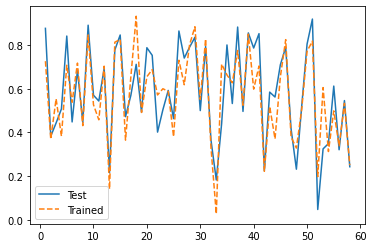

In [8]:
xr = np.arange(1,59,1);
plt.plot(xr,cnt_val,label = 'Test');
plt.plot(xr,valed, '--', label = 'Trained');
plt.legend();

The model has fitted the given data well which can be confirmed by the above plot and the calculated coefficient of determination ~ 0.98. The model complexity can be reduced my finding the correlation between features and target value, and eliminating the least correlated features. 

# Problem 2

Suppose that a taxi company wants to estimate the average number of trips per hour for the upcoming Valentine's Day weekend. The company is working under the assumption that the number of passengers can be modeled with a Poisson random variable (RV) with parameter $\lambda$ ($\lambda>0$).

* The poisson RV with parameter $\lambda$ has the following probability mass function (PMF): $p(x) = \frac{\lambda^x e^{-\lambda}}{x!}$.

The company's engineers decide to use a Gamma RV with parameters $\alpha=5$ and $\beta=0.5$ as the prior probability for the unknown parameter $\lambda$.

* The Gamma RV with parameters $\alpha$ and $\beta$ ($\alpha,\beta>0$) has the following probability density function: $f(\lambda)=\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$.

Suppose that you have a set of data with 10 samples:
\begin{align*}
x=[12,  5, 10, 10,  7, 17, 6, 11, 9, 9]
\end{align*}

Answer the following questions:

1. Compute the MLE estimate for $\lambda$. Show all your work.

2. Compute the MAP estimate for $\lambda$. Show all your work.

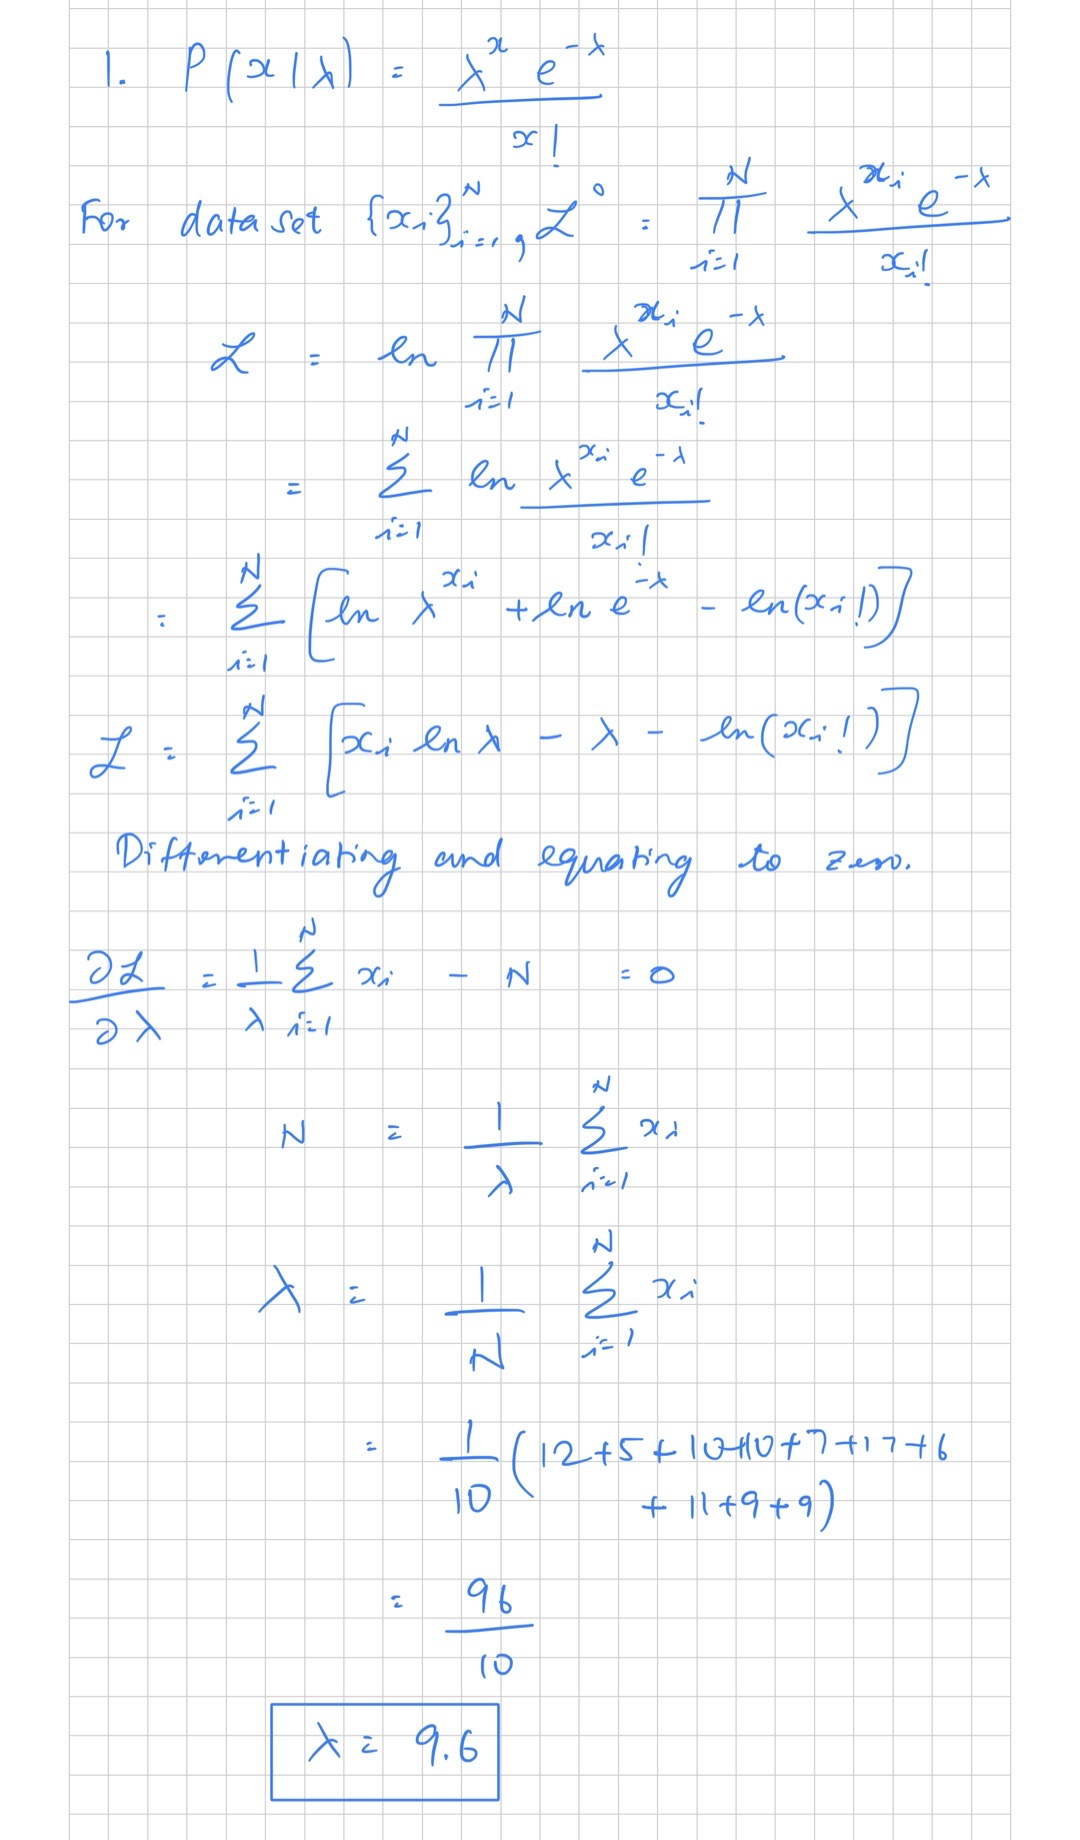

In [9]:
from IPython.display import Image

Image('1.JPEG', width = 1000)

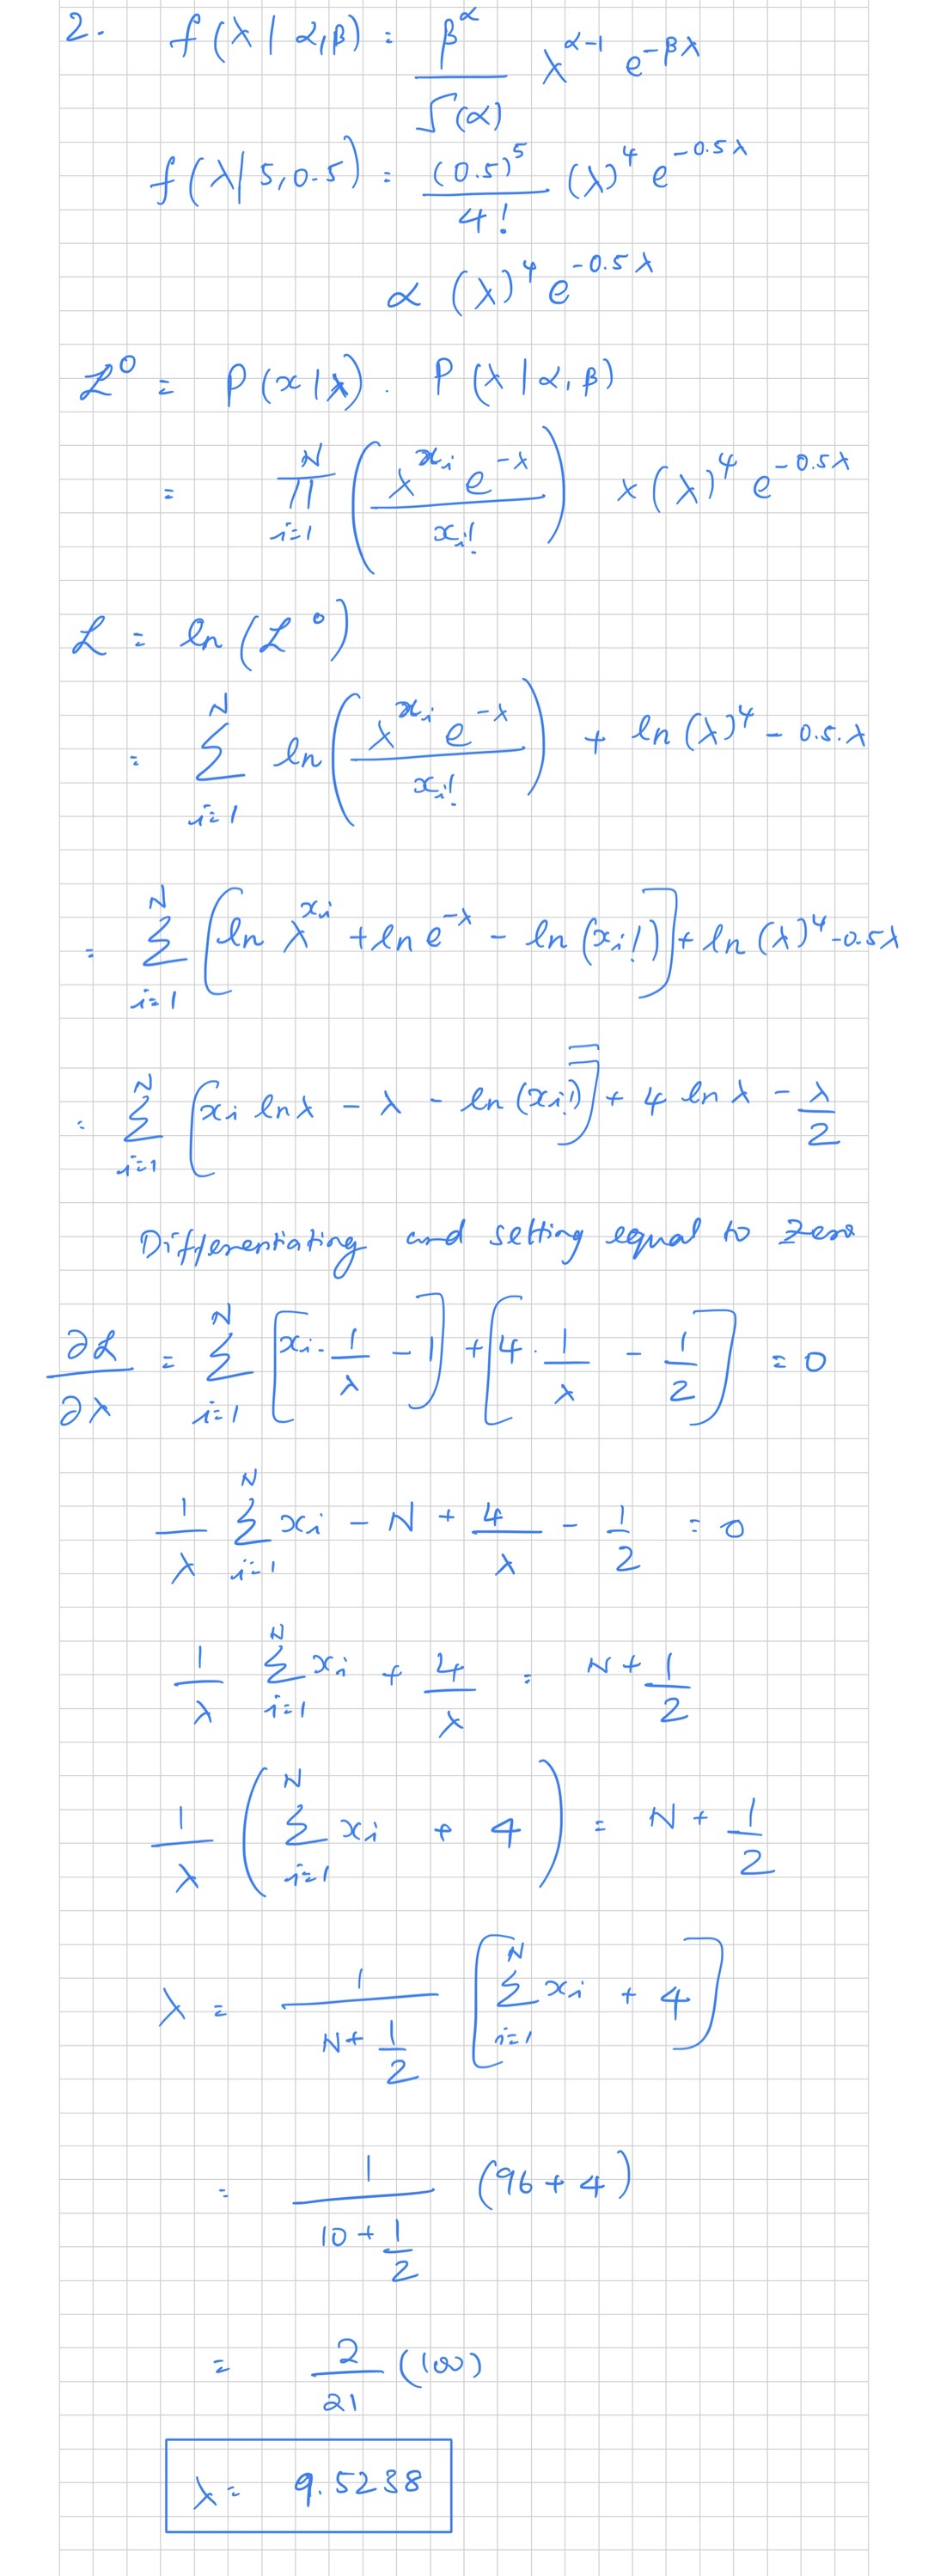

In [10]:
Image('2.JPEG', width = 1000)

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.